In [1]:
import pandas as pd
from category_encoders import target_encoder
import  geopandas
import numpy as np

In [154]:
def geo_column(df):
    try:
        
        coord = geopandas.tools.geocode(df,provider='opencage',api_key ='0e17531143b245579fe31858fa6f1d3e').geometry.array[0]
        return coord
    except:
        return 'nan'
        
def get_x_y(df):
    try:
        return df.geometry.x,df.geometry.y
    except:
        return np.nan, np.nan
def drop_outlier(df):
    if(df.geometry.x>0 or df.geometry.x<-80):
        return False
    else:
        return True


In [3]:
data = pd.read_csv('data/data_searched.csv')
data.head()

,Unnamed: 0,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator
0,71,True,False,Bridgeport,10/01/2013 12:46:00 AM,Bridgeport,V,1207,True,I,Speed Related,37.0,H,W,M,True
1,143,True,True,Milford,10/01/2013 01:50:00 AM,MILFORD,E,2325,True,I,Defective Lights,30.0,N,W,M,True
2,184,True,False,Torrington,10/01/2013 03:49:00 AM,Torrington,V,DACYR048,True,C,Registration,43.0,N,W,M,True
3,203,True,False,State Police,10/01/2013 05:30:00 AM,TOLLAND,V,1000002715,False,C,Other,19.0,N,B,M,False
4,212,True,False,Greenwich,10/01/2013 05:47:00 AM,RIVERSIDE,V,110993,False,N,Speed Related,34.0,M,B,M,False


In [90]:
unique_cities = pd.Series(data['InterventionLocationName'].str.strip().str.lower().unique())
unique_cities = unique_cities + ', Connecticut, USA'

In [91]:
unique_cities.to_list()

['bridgeport, Connecticut, USA',
 'milford, Connecticut, USA',
 'torrington, Connecticut, USA',
 'tolland, Connecticut, USA',
 'riverside, Connecticut, USA',
 'hampton, Connecticut, USA',
 'westport, Connecticut, USA',
 'meriden, Connecticut, USA',
 'darien, Connecticut, USA',
 'middletown, Connecticut, USA',
 'naugatuck, Connecticut, USA',
 'west hartford, Connecticut, USA',
 'montville, Connecticut, USA',
 'norwalk, Connecticut, USA',
 'essex, Connecticut, USA',
 'danbury, Connecticut, USA',
 'plainville, Connecticut, USA',
 'windham, Connecticut, USA',
 'glastonbury, Connecticut, USA',
 'newington, Connecticut, USA',
 'waterbury, Connecticut, USA',
 'groton city, Connecticut, USA',
 'manchester, Connecticut, USA',
 'new milford, Connecticut, USA',
 'branford, Connecticut, USA',
 'goshen, Connecticut, USA',
 'ridgefield, Connecticut, USA',
 'groton, Connecticut, USA',
 'hartford, Connecticut, USA',
 'norwich, Connecticut, USA',
 'clinton, Connecticut, USA',
 'wilton, Connecticut, USA

In [92]:
city_loc_dict = unique_cities.apply(geo_column)

In [138]:
dict_pandas = pd.DataFrame({"name":unique_cities, "geometry":city_loc_dict})
city_coords = pd.DataFrame(dict_pandas.apply(get_x_y,axis=1).to_list(),columns=['x','y']).join(dict_pandas.name)
city_coords.name = city_coords.reset_index().name.str.split(',',expand=True)[0]
city_coords.set_index('name').to_json('city_coords.json')

In [155]:
dict_pandas = dict_pandas.drop(dict_pandas[dict_pandas.geometry=='nan'].index)

In [156]:
dict_pandas = dict_pandas[dict_pandas.apply(drop_outlier,axis=1)]

In [174]:
cities_geopd=geopandas.GeoDataFrame(dict_pandas,crs={'init':'epsg:4326'})

In [175]:
cities_geopd = cities_geopd.to_crs(epsg=3857)


In [176]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [177]:
import contextily as ctx

In [178]:
#cities_geopd = cities_geopd.drop(cities_geopd[cities_geopd.geometry=='nan'].index)

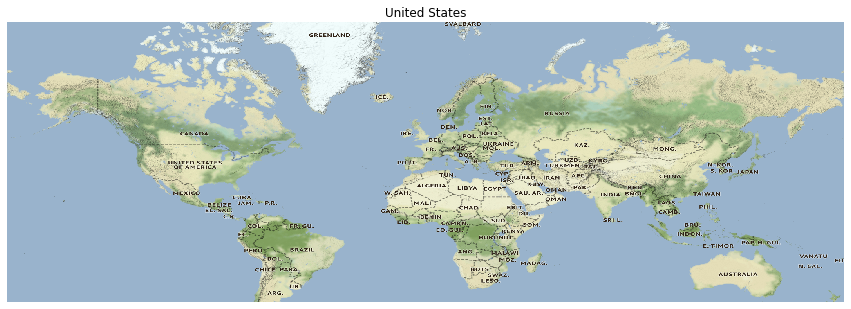

In [33]:
ctx.plot_map(ctx.Place('USA',zoom=3))

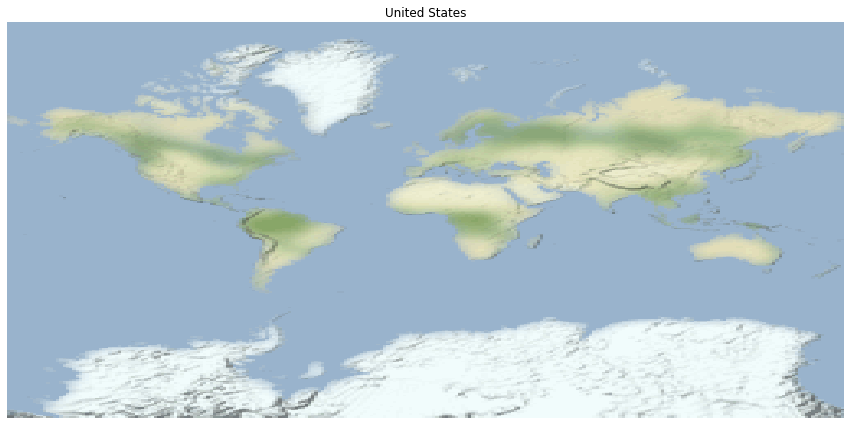

In [35]:
ctx.plot_map(ctx.Place('USA',zoom=0.5))

In [184]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/toner-lite/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

C:\Users\Francisco\Anaconda3\lib\site-packages\contextily\tile.py:199: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


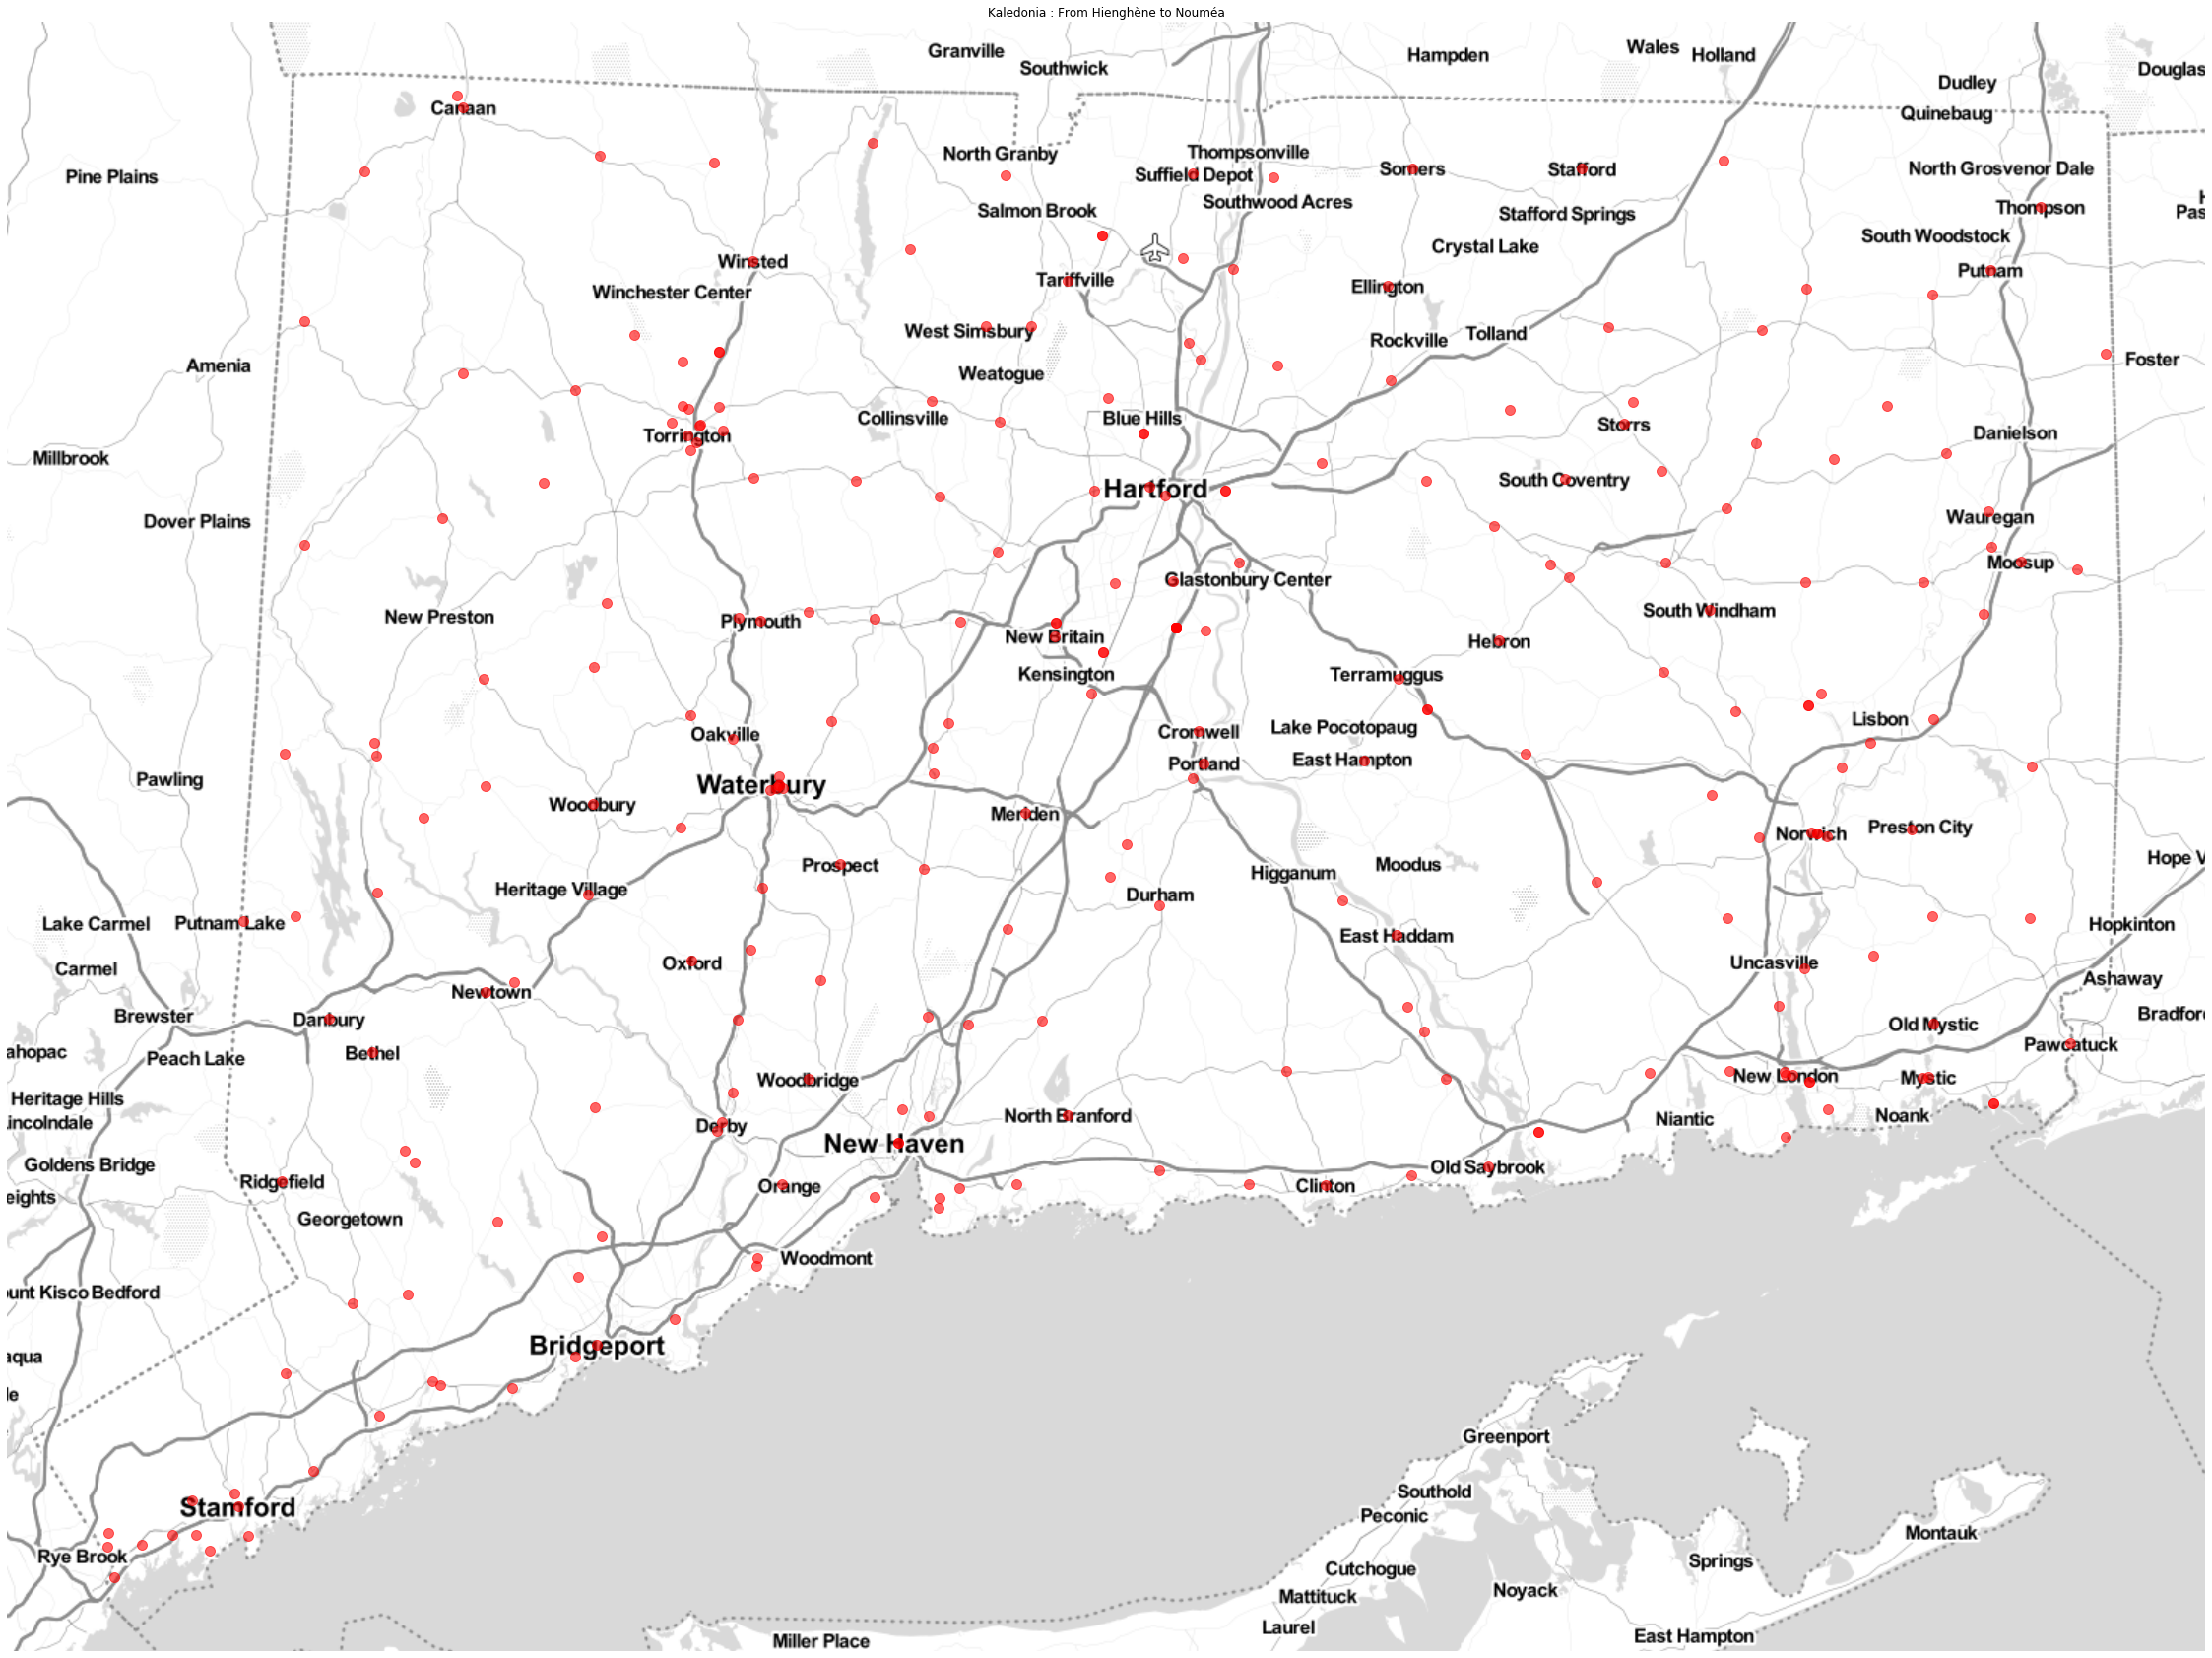

(-8210215.43003413, -7982610.905162243, 5005306.0335768, 5173927.6041697655)

In [239]:
# ... and make the plot
ax = cities_geopd.plot(marker='o',color = 'red' , markersize=100,
    figsize= (40, 40),
    alpha  = 0.6
)
add_basemap(ax, zoom=10)
ax.set_axis_off()
plt.title('Kaledonia : From Hienghène to Nouméa')
plt.show()
ax.axis()

In [218]:
drug_deaths=[]
for i in range(4):
    drug_deaths.append(pd.read_excel('DrugDeaths18xlsx (1).xlsx',i))
    drug_deaths[i]['Residence City'] = drug_deaths[i]['Residence City'].str.strip().str.lower()
    drug_deaths[i]['Residence County'] = drug_deaths[i]['Residence County'].str.strip().str.lower()

In [225]:
drug_deaths[0].Methadone.map({np.nan:0,'Y':1})

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
724    0.0
725    0.0
726    0.0
727    0.0
728    0.0
Name: Methadone, Length: 729, dtype: float64

C:\Users\Francisco\Anaconda3\lib\site-packages\contextily\tile.py:199: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001C90396F410>

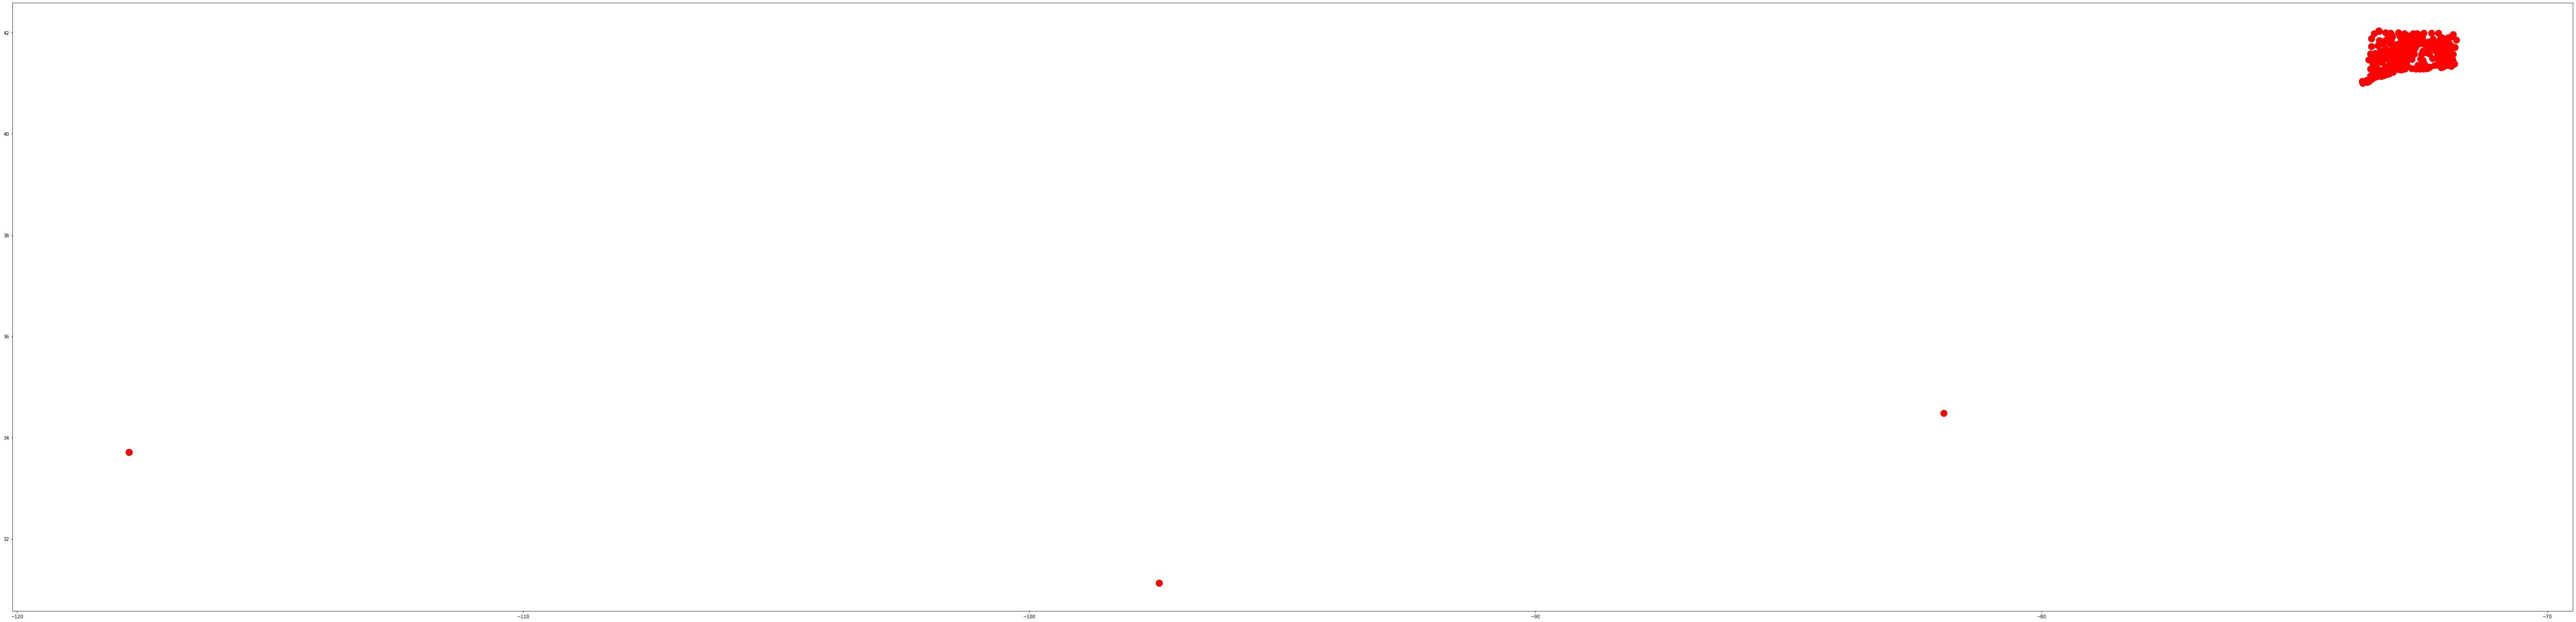

In [152]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 50))
#base = world.plot(color='white', edgecolor='black', ax=ax)

cg = cities_geopd.plot( marker='o', color='red', markersize=200,ax=ax)
add_basemap(ax, zoom=10)


In [75]:
city_loc_dict.to_list()

 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',

In [42]:
city_loc_dict.plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [87]:
dict_pandas

,name,geometry
0,bridgeport,POINT (-73.2048348 41.1670412)
1,milford,POINT (-73.0570603 41.2222218)
2,torrington,POINT (-73.1212214 41.8006523)
3,tolland,POINT (-72.3562252 41.818446)
4,riverside,POINT (-117.3961623 33.9533546)
...,...,...
275,ddarien,nan
276,n mianus,POINT (-73.58151359999999 41.0581525)
277,new haven,POINT (-72.92505180000001 41.3082138)
278,torrington/wincheste,nan


AttributeError: 'DataFrame' object has no attribute 'city'

In [193]:
city_coords[city_coords.x>0]

,x,y
city,,
montville,1.075095,49.547984
essex,0.579337,51.796699
norwich,1.292270,52.628606
colchester,0.899465,51.889690
new britain,151.557078,-5.224544
hebron,35.094487,31.528902
lebanon,35.843409,33.875063
berlin,13.388860,52.517037
avon,2.720722,48.404887


In [ ]:
new_ser = []
for c in unique_cities.to_list():
    try:
        
        coord = geopandas.tools.geocode(c,provider='opencage',api_key ='0e17531143b245579fe31858fa6f1d3e').geometry.array[0]
        print(coord)
        new_ser.append(coord)
    except:
        new_ser.append('nan')

In [17]:
data.iloc[:5].InterventionLocationName

0    Bridgeport
1       MILFORD
2    Torrington
3       TOLLAND
4     RIVERSIDE
Name: InterventionLocationName, dtype: object

In [37]:
from geopy.geocoders import OpenCage
import pandas as pd

In [29]:
city_coords = pd.read_json('city_coords.json')
city_coords

,x,y
bridgeport,-73.204835,41.167041
milford,-73.057060,41.222222
torrington,-73.121221,41.800652
tolland,-72.356225,41.818446
riverside,-117.396162,33.953355
...,...,...
ddarien,-87.970619,41.754995
n mianus,-73.581514,41.058152
new haven,-72.925052,41.308214
torrington/wincheste,-73.109849,41.807406


In [38]:
locator = OpenCage('0e17531143b245579fe31858fa6f1d3e')


In [122]:
len(cities)

65

In [124]:
cities = []
mortalities = []
error_indices = []
for i in range(280):
    print(i)
    try:
        
        coordinates=str(city_coords.iloc[i].y) + ", " + str(city_coords.iloc[i].x)
        location = locator.reverse(coordinates)
        exp = re.search(r'([A-Z][A-Z])',str(location[0][0]))
        print(exp.group())
        mort = mortality_state[states[exp.group()]]
        mortalities.append(mort)
        print(mort)
        cities.append(city_coords.iloc[i].name)
    except:
        error_indices.append(i)
        pass

0


C:\Users\Francisco\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: OpenCage.reverse: default value for `exactly_one` argument will become True in geopy 2.0. Specify `exactly_one=False` as the argument explicitly to get rid of this warning.
  if __name__ == '__main__':


CT
13.523936842105263
1
CT
13.523936842105263
2
CT
13.523936842105263
3
CT
13.523936842105263
4
CA
9.585136842105262
5
VA
9.188084210526316
6
CT
13.523936842105263
7
CT
13.523936842105263
8
CT
13.523936842105263
9
CT
13.523936842105263
10
CT
13.523936842105263
11
CT
13.523936842105263
12
NJ
11.46603157894737
13
CT
13.523936842105263
14
NJ
11.46603157894737
15
CT
13.523936842105263
16
CT
13.523936842105263
17
CT
13.523936842105263
18
CT
13.523936842105263
19
NH
15.325884210526317
20
CT
13.523936842105263
21
NY
8.880421052631577
22
NH
15.325884210526317
23
CT
13.523936842105263
24
CT
13.523936842105263
25
IN
12.981010526315789
26
CT
13.523936842105263
27
CT
13.523936842105263
28
CT
13.523936842105263
29
CT
13.523936842105263
30
IL
10.901626315789473
31
CT
13.523936842105263
32
CT
13.523936842105263
33
CT
13.523936842105263
34
MO
13.534615789473683
35
CT
13.523936842105263
36
KS
9.040568421052631
37
CT
13.523936842105263
38
CT
13.523936842105263
39
NH
15.325884210526317
40
CT
13.523936842

C:\Users\Francisco\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


PR
211
PA
17.460852631578945
212
CT
13.523936842105263
213
PA
17.460852631578945
214
NH
15.325884210526317
215
TX
8.653705263157894
216
IL
10.901626315789473
217
AR
10.49605263157895
218
NY
8.880421052631577
219
OH
16.742210526315787
220
PA
17.460852631578945
221
MA
15.02326842105263
222
NJ
11.46603157894737
223
CT
13.523936842105263
224
CO
13.23196842105263
225
NY
8.880421052631577
226
OR
10.966536842105263
227
MA
15.02326842105263
228
PA
17.460852631578945
229
IN
12.981010526315789
230
KY
19.157989473684207
231
AR
10.49605263157895
232
UT
18.300936842105262
233
CA
9.585136842105262
234
CT
13.523936842105263
235
PR
236
NY
8.880421052631577
237
CT
13.523936842105263
238
CT
13.523936842105263
239
CT
13.523936842105263
240
MA
15.02326842105263
241
CT
13.523936842105263
242
PA
17.460852631578945
243
MA
15.02326842105263
244
SD
5.682363157894738
245
IL
10.901626315789473
246
IL
10.901626315789473
247
MA
15.02326842105263
248
KY
19.157989473684207
249
SC
11.550026315789474
250
MN
7.20029473

In [126]:
pd.DataFrame(mortalities,columns = ['mortality'],index=cities).to_csv('mortality_per_city.csv')

In [80]:
import re
exp = re.search(r'([A-Z][A-Z])',str(location[0][0]))
print(re.search(r'( [A-Z][A-Z] )',str(location[0][0])))

<re.Match object; span=(23, 27), match=' NJ '>


In [89]:
mortality_state[states[exp.group()]]

11.46603157894737

In [82]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [88]:
mortality_state = pd.read_csv('NCHS_Drug_Mortality.csv').groupby('State').mean()['Age-adjusted Rate']